<center><h2><strong><font color="blue">Pendahuluan Data Mining</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/course/adm/"> https://tau-data.id/course/adm/ </a></font></strong></h3></center>

<img alt="" src="images/Cover_ADM.png" />

<center><h2><strong><font color="blue">Supervised Learning - Classification 02</font></strong></h2></center>
<center><font color="blue">Decision Tree, Random Forest, and Support Vector Machines</font></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/lesson/adm-classification-02/">https://tau-data.id/lesson/adm-classification-02/</a></font></strong></h3></center>
<b><center><h3>(C) Taufik Sutanto</h3></center>

# Outline:

* Decision Tree
* Random Forest
* Support Vector Machines
* Hyperparameter Optimization
* Pemilihan Model

In [ ]:
# Cell ini dijalankan HANYA jika menggunakan Google Colab. 
# Jika di jalankan di Jupyter Notebook sebaiknya di jalankan di terminal (command prompt) tanpa tanda "!" 

!pip install graphviz dtreeviz
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/diabetes_data.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/hr_data.csv

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter
sns.set(style="ticks", color_codes=True)

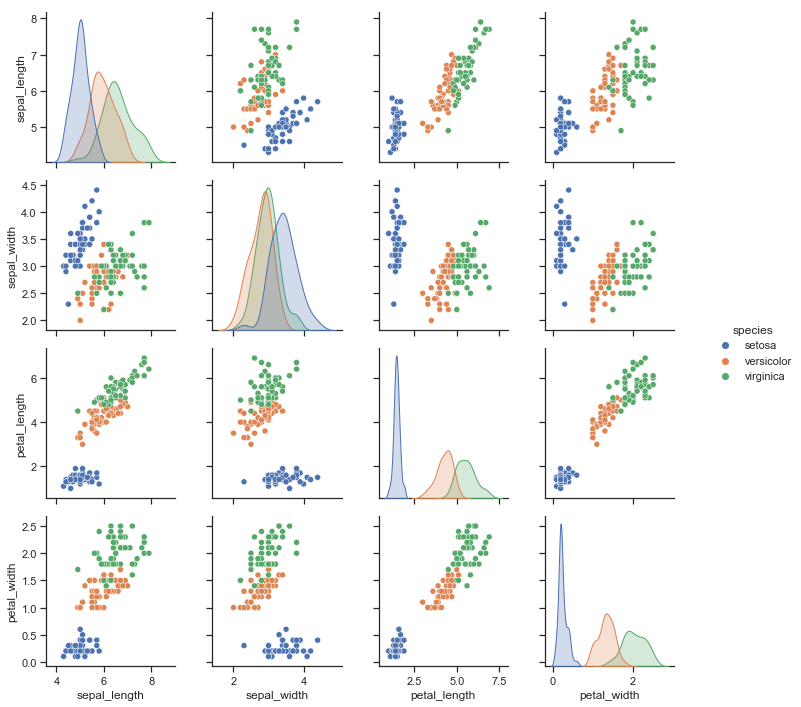

In [2]:
# load kembali iris data
df = sns.load_dataset("iris")
g = sns.pairplot(df, hue="species")

In [3]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
# Separate Data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 99
validation_size = 0.3
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(x_train.shape, x_test.shape, len(y_test))

(105, 4) (45, 4) 45


In [5]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

DT = tree.DecisionTreeClassifier() 
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(x_train, y_train)
y_DT = DT.predict(x_test)
print(accuracy_score(y_test, y_DT))
print(confusion_matrix(y_test, y_DT))
print(classification_report(y_test, y_DT))

0.9555555555555556
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [6]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.        , 0.        , 0.08274232, 0.91725768])

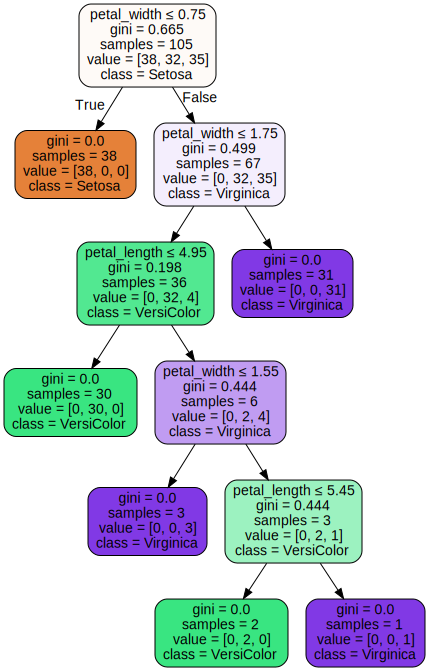

In [7]:
# Kelebihan lain Decision Tree yang tidak dimiliki model lain
# "WARNING" 
# 1. tidak bisa dijalankan di Google Colab
# 2. membutuhkan software "graphViz" + setting system variabel
# caranya ada disini: https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['sepal_length','sepal_width','petal_length','petal_width']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [8]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)
print('Akurasi = ', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Akurasi =  0.9555555555555556
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Feature ranking:
1. feature 2 (0.501306)
2. feature 3 (0.398841)
3. feature 0 (0.078318)
4. feature 1 (0.021535)


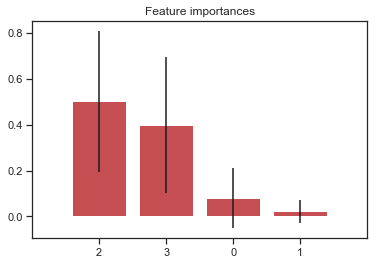

In [9]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Bagaimana dengan data kategorik?
* Sama dengan regresi (logistik) ==> Dummy (indicator variable) variable.
* Misal X1 = {a,b,c} ==> X1_a = [1,0,0], X1_b = [0,1,0], X1_c = [0,0,1]
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [10]:
# Contoh
df = pd.DataFrame({'X1': ['a', 'b', 'a','c','a'],'X2': [1, 2, 3, 2, 1]})
df = pd.get_dummies(df) # get_dummies(df, prefix=['dummy'])
df

,X2,X1_a,X1_b,X1_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,2,0,0,1
4,1,1,0,0


## Normalisasi/Standarisasi Data
* Sama seperti Regresi (logistik) prediktor/features di model SVM perlu untuk di standarisasi/normalisasi.
* http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
* Hati-hati standarisasi data dilakukan setelah outlier ditangani dengan baik.

In [11]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
df['X2'] = scaler.fit_transform(df[['X2']])
df

,X2,X1_a,X1_b,X1_c
0,-1.069045,1,0,0
1,0.267261,0,1,0
2,1.603567,1,0,0
3,0.267261,0,0,1
4,-1.069045,1,0,0


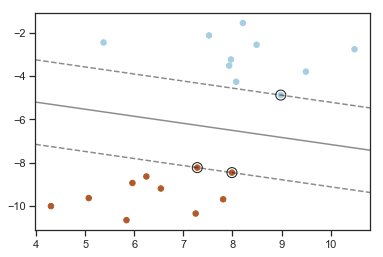

In [12]:
# Contoh plotting Optimal Hyperplane
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

X, y = make_blobs(n_samples=20, centers=2, random_state=6) # we create 20 separable points
clf = svm.SVC(kernel='linear', C=1000) # fit the model, don't regularize for illustration purposes
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca();xlim = ax.get_xlim(); ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30);yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')# plot support vectors
plt.show()

In [13]:
# Contoh Binary SVM (dengan dan tanpa kernel)
# Loading Data
df = sns.load_dataset("iris")
df2 = df[df['species'].isin(['setosa','versicolor'])]
print(df2.shape)
df2.sample(7)

(100, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
40,5.0,3.5,1.3,0.3,setosa
48,5.3,3.7,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
69,5.6,2.5,3.9,1.1,versicolor
18,5.7,3.8,1.7,0.3,setosa
16,5.4,3.9,1.3,0.4,setosa


In [14]:
# Separate the data
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df2['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(70, 4) 30


In [15]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
print(confusion_matrix(Y_test, y_SVM))
print(classification_report(Y_test, y_SVM))

Akurasi =  1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [21 37]
Vector Datanya: 
 [[4.8 3.4 1.9 0.2]
 [5.1 2.5 3.  1.1]]


In [17]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[ 0.20547963 -0.61643888  0.7534253   0.61643888]]
b =  [-1.44520713]


In [18]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(accuracy_score(Y_test, y_SVM))

0.4
1.0
1.0


In [19]:
# Contoh Multiklasifikasi SVM (dengan dan tanpa kernel)
# Separate the data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [20]:
# One Versus All: http://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf
dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  1.0


c:\winpython\python-3.6.8.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [21]:
# Ada 3 classifier (as expected)
dSVM.coef_

array([[ 0.21102641,  0.39116301, -0.78332185, -0.39841426],
       [ 0.0813344 , -0.71450621,  0.27319854, -0.68475556],
       [-0.78631988, -0.97099593,  1.35325365,  1.5903778 ]])

In [22]:
# All At Once Method http://www.jmlr.org/papers/volume2/crammer01a/crammer01a.pdf
dSVM = svm.SVC(decision_function_shape='ovo')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9777777777777777


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

# Hyperparameter Optimization

In [23]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes_data.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/diabetes_data.csv
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
    
print(data.shape)

(768, 9)


In [24]:
prop_test = 0.2

X, Y = data[:,0:8], data[:,8] # Slice data
Y = [int(y) for y in Y]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=prop_test)

print(set(Y), x_train.shape, x_test.shape, sep='\n')

{0, 1}
(614, 8)
(154, 8)


# Kita mulai dengan menjalankan semua Model sebelumnya 

## Menggunakan default parameter dan cross validasi

Regresi Logistik [0.7741935483870968, 0.7258064516129032, 0.8064516129032258, 0.6935483870967742]
k-NN [0.7580645161290323, 0.6935483870967742, 0.6935483870967742, 0.6774193548387096]
Naive Bayes [0.7903225806451613, 0.8225806451612904, 0.7580645161290323, 0.6612903225806451]
Decision Tree [0.6290322580645161, 0.7258064516129032, 0.6935483870967742, 0.7258064516129032]
Random Forest [0.8387096774193549, 0.8225806451612904, 0.7419354838709677, 0.6451612903225806]
SVM [0.7580645161290323, 0.7580645161290323, 0.7258064516129032, 0.6612903225806451]


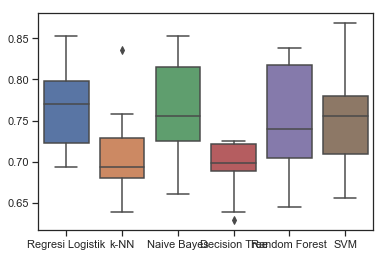

In [33]:
clf = LogisticRegression(solver='liblinear')
kNN = neighbors.KNeighborsClassifier()
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m, list(s)[:4])

In [26]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [27]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) # , pre_dispatch='2*n_jobs', pre_dispatch min 2* n_jobs
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.7s


0.7394764674775252
{'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}


[Parallel(n_jobs=-2)]: Done 160 out of 160 | elapsed:    5.0s finished


In [28]:
# Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.

pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [29]:
# Optimal parameter SVM dengan RandomizedSearch
# WARNING cell ini butuh waktu komputasi cukup lama
kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 5, 10] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
#paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(x_train, y_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.6min finished


0.7672131147540984
{'svc__kernel': 'linear', 'svc__gamma': 0.1, 'svc__C': 5}


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:  1.9min remaining:   27.9s


Accuracy kNN: 0.73 (+/- 0.06)
Accuracy SVM: 0.77 (+/- 0.10)


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:  2.0min finished


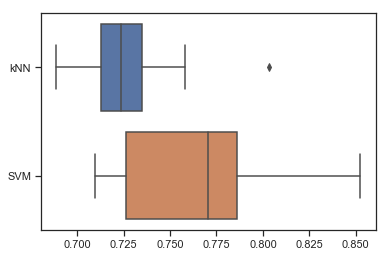

In [30]:
import seaborn as sns, matplotlib.pyplot as plt

kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, x_train, y_train, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, x_train, y_train, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

<h1>End of Module</h1>
<hr />